In [1]:
##loading dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##load data
bikedf=pd.read_excel('SeoulBikeData.xlsx')
bikedf.head()

Date  Rented Bike Count  Hour  Temperature(蚓)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   
3 2017-12-01                107     3            -6.2           40   
4 2017-12-01                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

# Dataset Summary

In [3]:
##shape of the data
bikedf.shape

(8760, 14)

In [4]:
##name of the columns available
bikedf.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
##info of the data
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(蚓)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(蚓)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [6]:
## Normalize the datatypes in a float datatype
cols=[n for n in bikedf.columns if bikedf[n].dtypes=='int']
cols
for r in cols:
    bikedf[r]=bikedf[r].astype('float')

In [7]:
##data type is changed and uniform
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   float64       
 2   Hour                      8760 non-null   float64       
 3   Temperature(蚓)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   float64       
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   float64       
 7   Dew point temperature(蚓)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [8]:
##check duplicate
bikedf.duplicated().value_counts()

False    8760
Name: count, dtype: int64

In [9]:
##missining values
bikedf.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(蚓)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(蚓)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

## Observation
No duplicates present.

In [10]:
##count the presence of the unique values in each features
bikedf.nunique().sort_values(ascending=True)

Holiday                        2
Functioning Day                2
Seasons                        4
Hour                          24
Snowfall (cm)                 51
Rainfall(mm)                  61
Wind speed (m/s)              65
Humidity(%)                   90
Solar Radiation (MJ/m2)      345
Date                         365
Temperature(蚓)               546
Dew point temperature(蚓)     556
Visibility (10m)            1789
Rented Bike Count           2166
dtype: int64

In [11]:
##summary stats 
bikedf.describe(include='number').T

count         mean         std   min     25%  \
Rented Bike Count         8760.0   704.602055  644.997468   0.0  191.00   
Hour                      8760.0    11.500000    6.922582   0.0    5.75   
Temperature(蚓)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)               8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)          8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)          8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(蚓)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)   8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)              8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)             8760.0     0.075068    0.436746   0.0    0.00   

                              50%      75%      max  
Rented Bike Count          504.50  1065.25  3556.00  
Hour                        11.50    17.25    23.00  
Temperature(蚓)              13.70    22.50    39.40  
Humidity(%)                 57.00    74.00    98.00  
Wind speed (m/s)             1.50     2.30     7.40  
Visibility (10m)          1698.00  2000.00  2000.00  
Dew point temperature(蚓)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)      0.01     0.93     3.52  
Rainfall(mm)                 0.00     0.00    35.00  
Snowfall (cm)                0.00     0.00     8.80

# Observation
    75% of the rented bike count is less than 1065.25 in the dataset.
    75% of the bikes are rented less  17.25 hours.
    75% of bikes are rented when there is the temparature is less then 22.50.
    75% of bikes are rented when humidity percentage is lesser than 74.00	.
    75% of bikes are rented when the visibility(10m) of 2000.00m.
    75% of the bikes are rented when the solar radiation is lesser than 0.93.
    75% of the bikes are rented when rainfall(mm) and snowfall(cm) is lesser than 0.00.

## Standard deviation
Rented bike count seems highly spreadout because the standard deviation value = 644.99 and the mean value = 704.602055 are almost close to each other, it could have data skewness issue.

## Maximum values
1. Minimum bike rent count is 0 and Maximum is 3556.0 in a day.
2. Maximum temperatur is 39.4 and minimum is -17.



In [12]:
##numerical features
num_feature=[num for num in bikedf.columns if bikedf[num].dtype!='O']
print(num_feature)
print()
cat_feature=[cat for cat in bikedf.columns if bikedf[cat].dtype=='object']
cat_feature

['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']



['Seasons', 'Holiday', 'Functioning Day']

## Observation 
Names of the columns requires the normalization because of it includes unwanted symbols etc.

## Rename with Abbrev:
1. Date = Date
2. Rented Bike Count= Count
3. Hour = Hour
4. Temperature(蚓) =Temp
5. Humidity(%)= Humidity
6. Wind speed (m/s)= Wind
7. Visibility (10m) = Visibility
8. Dew point temperature(蚓)= DewTemp
9. Solar Radiation (MJ/m2) = SolarRad
10. Rainfall(mm)= Rainfall
11. Snowfall (cm)= Snowfall
12. Seasons= Seasons
13. Holiday = Holiday
14. Functioning Day= FuncDay

# Data Manipulation

In [13]:
## rename the columns to make all coloumns standard
df_bike=bikedf.copy()

##renaming the columns with the standard names
df_bike.rename({'Rented Bike Count':'Count',
                'Temperature(蚓)':'Temp',
                'Humidity(%)':'Humidity',
                'Wind speed (m/s)':'Wind',
                'Visibility (10m)':'Visibility',
                'Dew point temperature(蚓)':'DewTemp',
                'Solar Radiation (MJ/m2)':'SolarRad',
                'Rainfall(mm)':'Rainfall',
                'Snowfall (cm)':'Snowfall',
                'Functioning Day':'FuncDay'},axis=1,inplace=True)
df_bike.head()

Date  Count  Hour  Temp  Humidity  Wind  Visibility  DewTemp  \
0 2017-12-01  254.0   0.0  -5.2      37.0   2.2      2000.0    -17.6   
1 2017-12-01  204.0   1.0  -5.5      38.0   0.8      2000.0    -17.6   
2 2017-12-01  173.0   2.0  -6.0      39.0   1.0      2000.0    -17.7   
3 2017-12-01  107.0   3.0  -6.2      40.0   0.9      2000.0    -17.6   
4 2017-12-01   78.0   4.0  -6.0      36.0   2.3      2000.0    -18.6   

   SolarRad  Rainfall  Snowfall Seasons     Holiday FuncDay  
0       0.0       0.0       0.0  Winter  No Holiday     Yes  
1       0.0       0.0       0.0  Winter  No Holiday     Yes  
2       0.0       0.0       0.0  Winter  No Holiday     Yes  
3       0.0       0.0       0.0  Winter  No Holiday     Yes  
4       0.0       0.0       0.0  Winter  No Holiday     Yes

In [14]:
## unique value of column Seasons
print(f'Unique values present in the Seasons column: {df_bike['Seasons'].unique()}\n')
print(f'Unique values present in the Holiday column: {df_bike['Holiday'].unique()}\n')
print(f'Unique values present in the Functioning Day column: {df_bike['FuncDay'].unique()}')

Unique values present in the Seasons column: ['Winter' 'Spring' 'Summer' 'Autumn']

Unique values present in the Holiday column: ['No Holiday' 'Holiday']

Unique values present in the Functioning Day column: ['Yes' 'No']


In [15]:
## Extracting the Day, Month and Year feature from the Date column
df_bike['Day']=df_bike['Date'].dt.day
df_bike['WeekDay']=df_bike['Date'].dt.day_name()
df_bike['Month']=df_bike['Date'].dt.month_name()
df_bike['Year']=df_bike['Date'].dt.year

In [16]:
df_bike.head()

Date  Count  Hour  Temp  Humidity  Wind  Visibility  DewTemp  \
0 2017-12-01  254.0   0.0  -5.2      37.0   2.2      2000.0    -17.6   
1 2017-12-01  204.0   1.0  -5.5      38.0   0.8      2000.0    -17.6   
2 2017-12-01  173.0   2.0  -6.0      39.0   1.0      2000.0    -17.7   
3 2017-12-01  107.0   3.0  -6.2      40.0   0.9      2000.0    -17.6   
4 2017-12-01   78.0   4.0  -6.0      36.0   2.3      2000.0    -18.6   

   SolarRad  Rainfall  Snowfall Seasons     Holiday FuncDay  Day WeekDay  \
0       0.0       0.0       0.0  Winter  No Holiday     Yes    1  Friday   
1       0.0       0.0       0.0  Winter  No Holiday     Yes    1  Friday   
2       0.0       0.0       0.0  Winter  No Holiday     Yes    1  Friday   
3       0.0       0.0       0.0  Winter  No Holiday     Yes    1  Friday   
4       0.0       0.0       0.0  Winter  No Holiday     Yes    1  Friday   

      Month  Year  
0  December  2017  
1  December  2017  
2  December  2017  
3  December  2017  
4  December  2017

In [17]:
df_bike.drop('Date',axis=1,inplace=True)

In [18]:
df_bike

Count  Hour  Temp  Humidity  Wind  Visibility  DewTemp  SolarRad  \
0      254.0   0.0  -5.2      37.0   2.2      2000.0    -17.6       0.0   
1      204.0   1.0  -5.5      38.0   0.8      2000.0    -17.6       0.0   
2      173.0   2.0  -6.0      39.0   1.0      2000.0    -17.7       0.0   
3      107.0   3.0  -6.2      40.0   0.9      2000.0    -17.6       0.0   
4       78.0   4.0  -6.0      36.0   2.3      2000.0    -18.6       0.0   
...      ...   ...   ...       ...   ...         ...      ...       ...   
8755  1003.0  19.0   4.2      34.0   2.6      1894.0    -10.3       0.0   
8756   764.0  20.0   3.4      37.0   2.3      2000.0     -9.9       0.0   
8757   694.0  21.0   2.6      39.0   0.3      1968.0     -9.9       0.0   
8758   712.0  22.0   2.1      41.0   1.0      1859.0     -9.8       0.0   
8759   584.0  23.0   1.9      43.0   1.3      1909.0     -9.3       0.0   

      Rainfall  Snowfall Seasons     Holiday FuncDay  Day WeekDay     Month  \
0          0.0       0.0  Winter  No Holiday     Yes    1  Friday  December   
1          0.0       0.0  Winter  No Holiday     Yes    1  Friday  December   
2          0.0       0.0  Winter  No Holiday     Yes    1  Friday  December   
3          0.0       0.0  Winter  No Holiday     Yes    1  Friday  December   
4          0.0       0.0  Winter  No Holiday     Yes    1  Friday  December   
...        ...       ...     ...         ...     ...  ...     ...       ...   
8755       0.0       0.0  Autumn  No Holiday     Yes   30  Friday  November   
8756       0.0       0.0  Autumn  No Holiday     Yes   30  Friday  November   
8757       0.0       0.0  Autumn  No Holiday     Yes   30  Friday  November   
8758       0.0       0.0  Autumn  No Holiday     Yes   30  Friday  November   
8759       0.0       0.0  Autumn  No Holiday     Yes   30  Friday  November   

      Year  
0     2017  
1     2017  
2     2017  
3     2017  
4     2017  
...    ...  
8755  2018  
8756  2018  
8757  2018  
8758  2018  
8759  2018  

[8760 rows x 17 columns]

# Exploratory Data Analysis
## Univariate Analysis

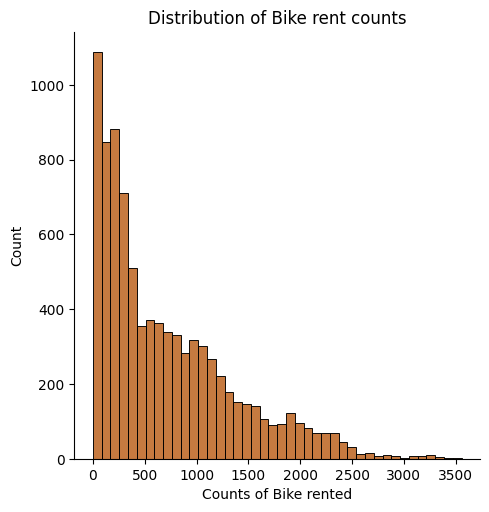

In [19]:
##Rented bike count 
sns.displot(x=df_bike['Count'],color=[0.7,0.3,0])
plt.xlabel("Counts of Bike rented")
plt.title("Distribution of Bike rent counts")
plt.show()

## Observation 
Most of the bike rent counts are less than 500.

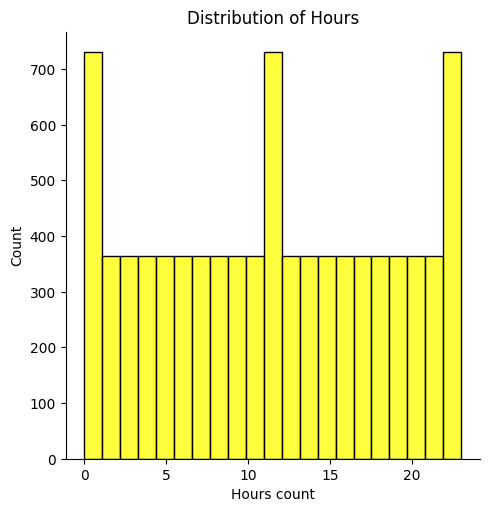

In [20]:
##hourly distribution
sns.displot(x=df_bike['Hour'],color=[1,1,0])
plt.title("Distribution of Hours")
plt.xlabel("Hours count")
plt.show()

## Observation 
There are 3 peak hours.

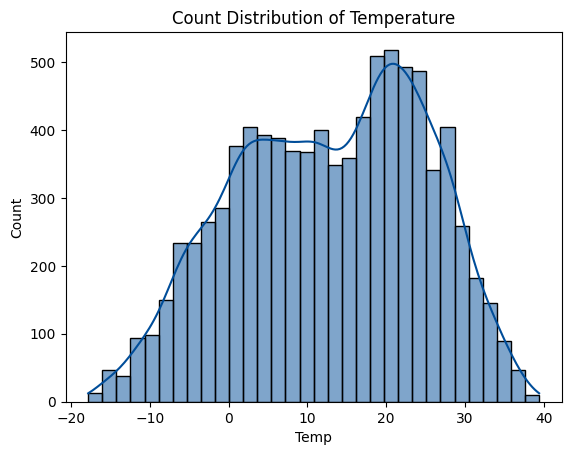

In [21]:
## distribution of temperature
sns.histplot(x=df_bike['Temp'],kde=True, color=[0,.3,.6])
plt.title("Count Distribution of Temperature")
plt.show()

## Observation
To some extend it is normally distributed. so temperature ranges between 10 to 25.

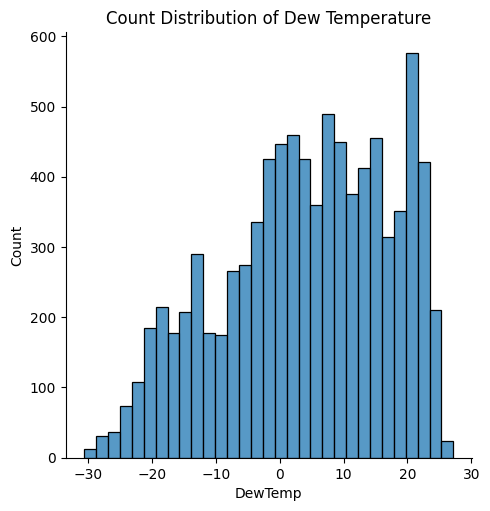

In [22]:
##Distribution of 
sns.displot(x=df_bike['DewTemp'])
plt.title("Count Distribution of Dew Temperature")
plt.show()

## Observation
Seems a skewness nature. Most of the day the dew temperature is ranges between 0 to 25.

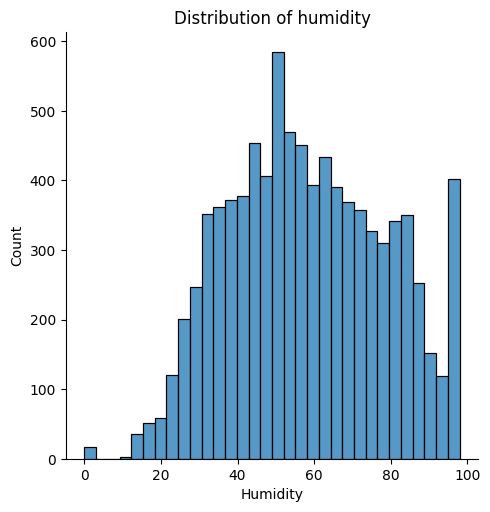

In [23]:
##humididty
sns.displot(x=df_bike['Humidity'])
plt.title("Distribution of humidity")
plt.show()

## Observation
Mos of the day the presence of humididty ranges between 20 to 95.

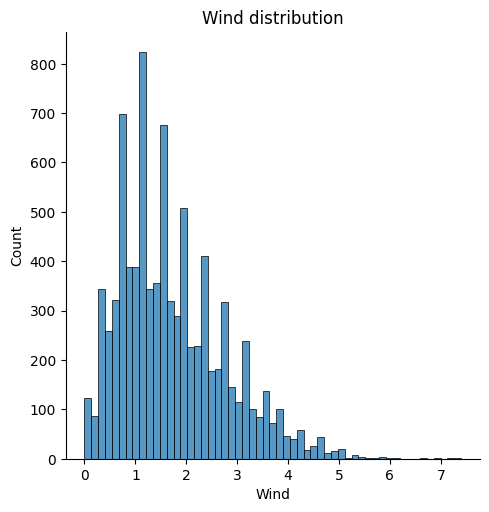

In [24]:
## wind distribution
sns.displot(x=df_bike['Wind'])
plt.title("Wind distribution")
plt.show()

## Observation
So most of the day the wind speed ranges between 5m/s to 2.5m/s.

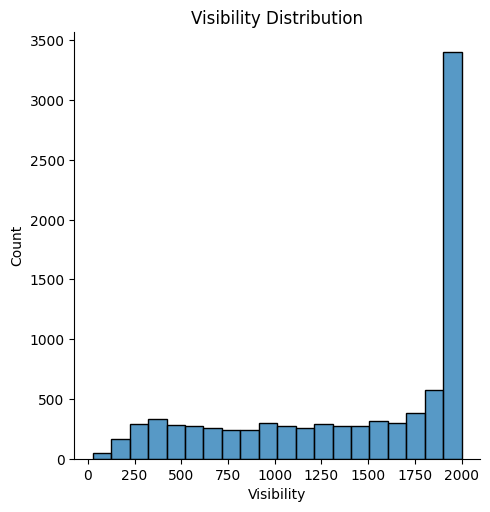

In [25]:
## visibility distribution
sns.displot(x=df_bike['Visibility'])
plt.title("Visibility Distribution")
plt.show()

## Observation
Left skewed, most of the days has visibility of 2000

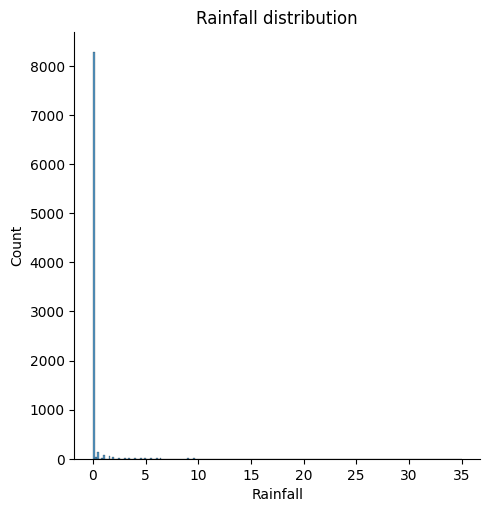

In [26]:
##solar radiation
sns.displot(x=df_bike['Rainfall'])
plt.title("Rainfall distribution")
plt.show()

## Observation
Frequency of rainfall seems less in comparison.

# Categorical distribution 

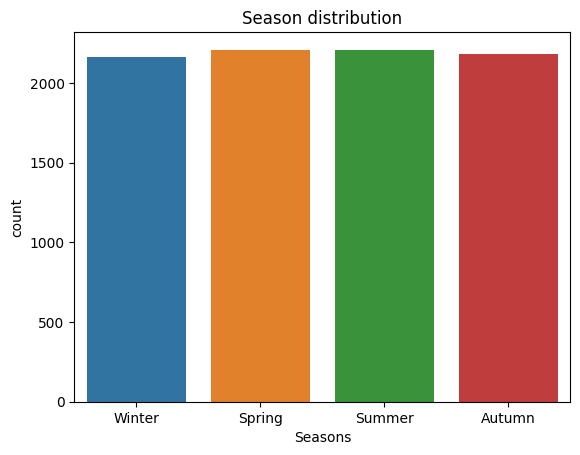

In [27]:
## season countplot
sns.countplot(data=df_bike, x=df_bike['Seasons'], hue=df_bike['Seasons'])
plt.title("Season distribution")
plt.show()

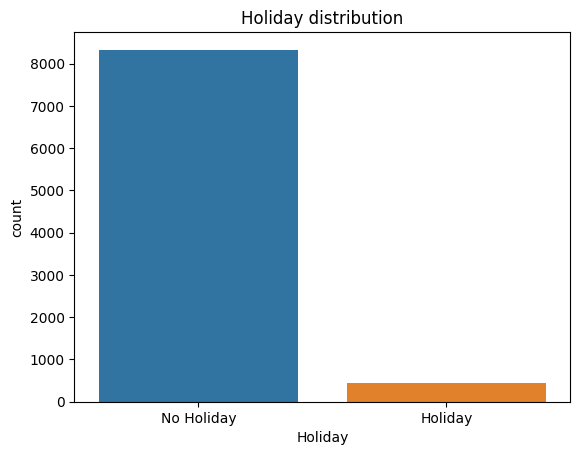

In [28]:
## holiday distribution
sns.countplot(data=df_bike, x=df_bike['Holiday'], hue=df_bike['Holiday'])
plt.title("Holiday distribution")
plt.show()

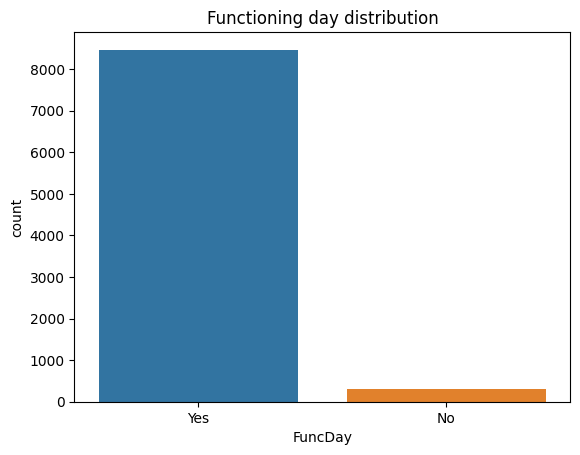

In [29]:
## functioning day
sns.countplot(data=df_bike,x=df_bike['FuncDay'],hue=df_bike['FuncDay'])
plt.title("Functioning day distribution")
plt.show()

## Observation
Higher demand of bikes on Summer season, Working days and functioning days.

# Bivariate analysis

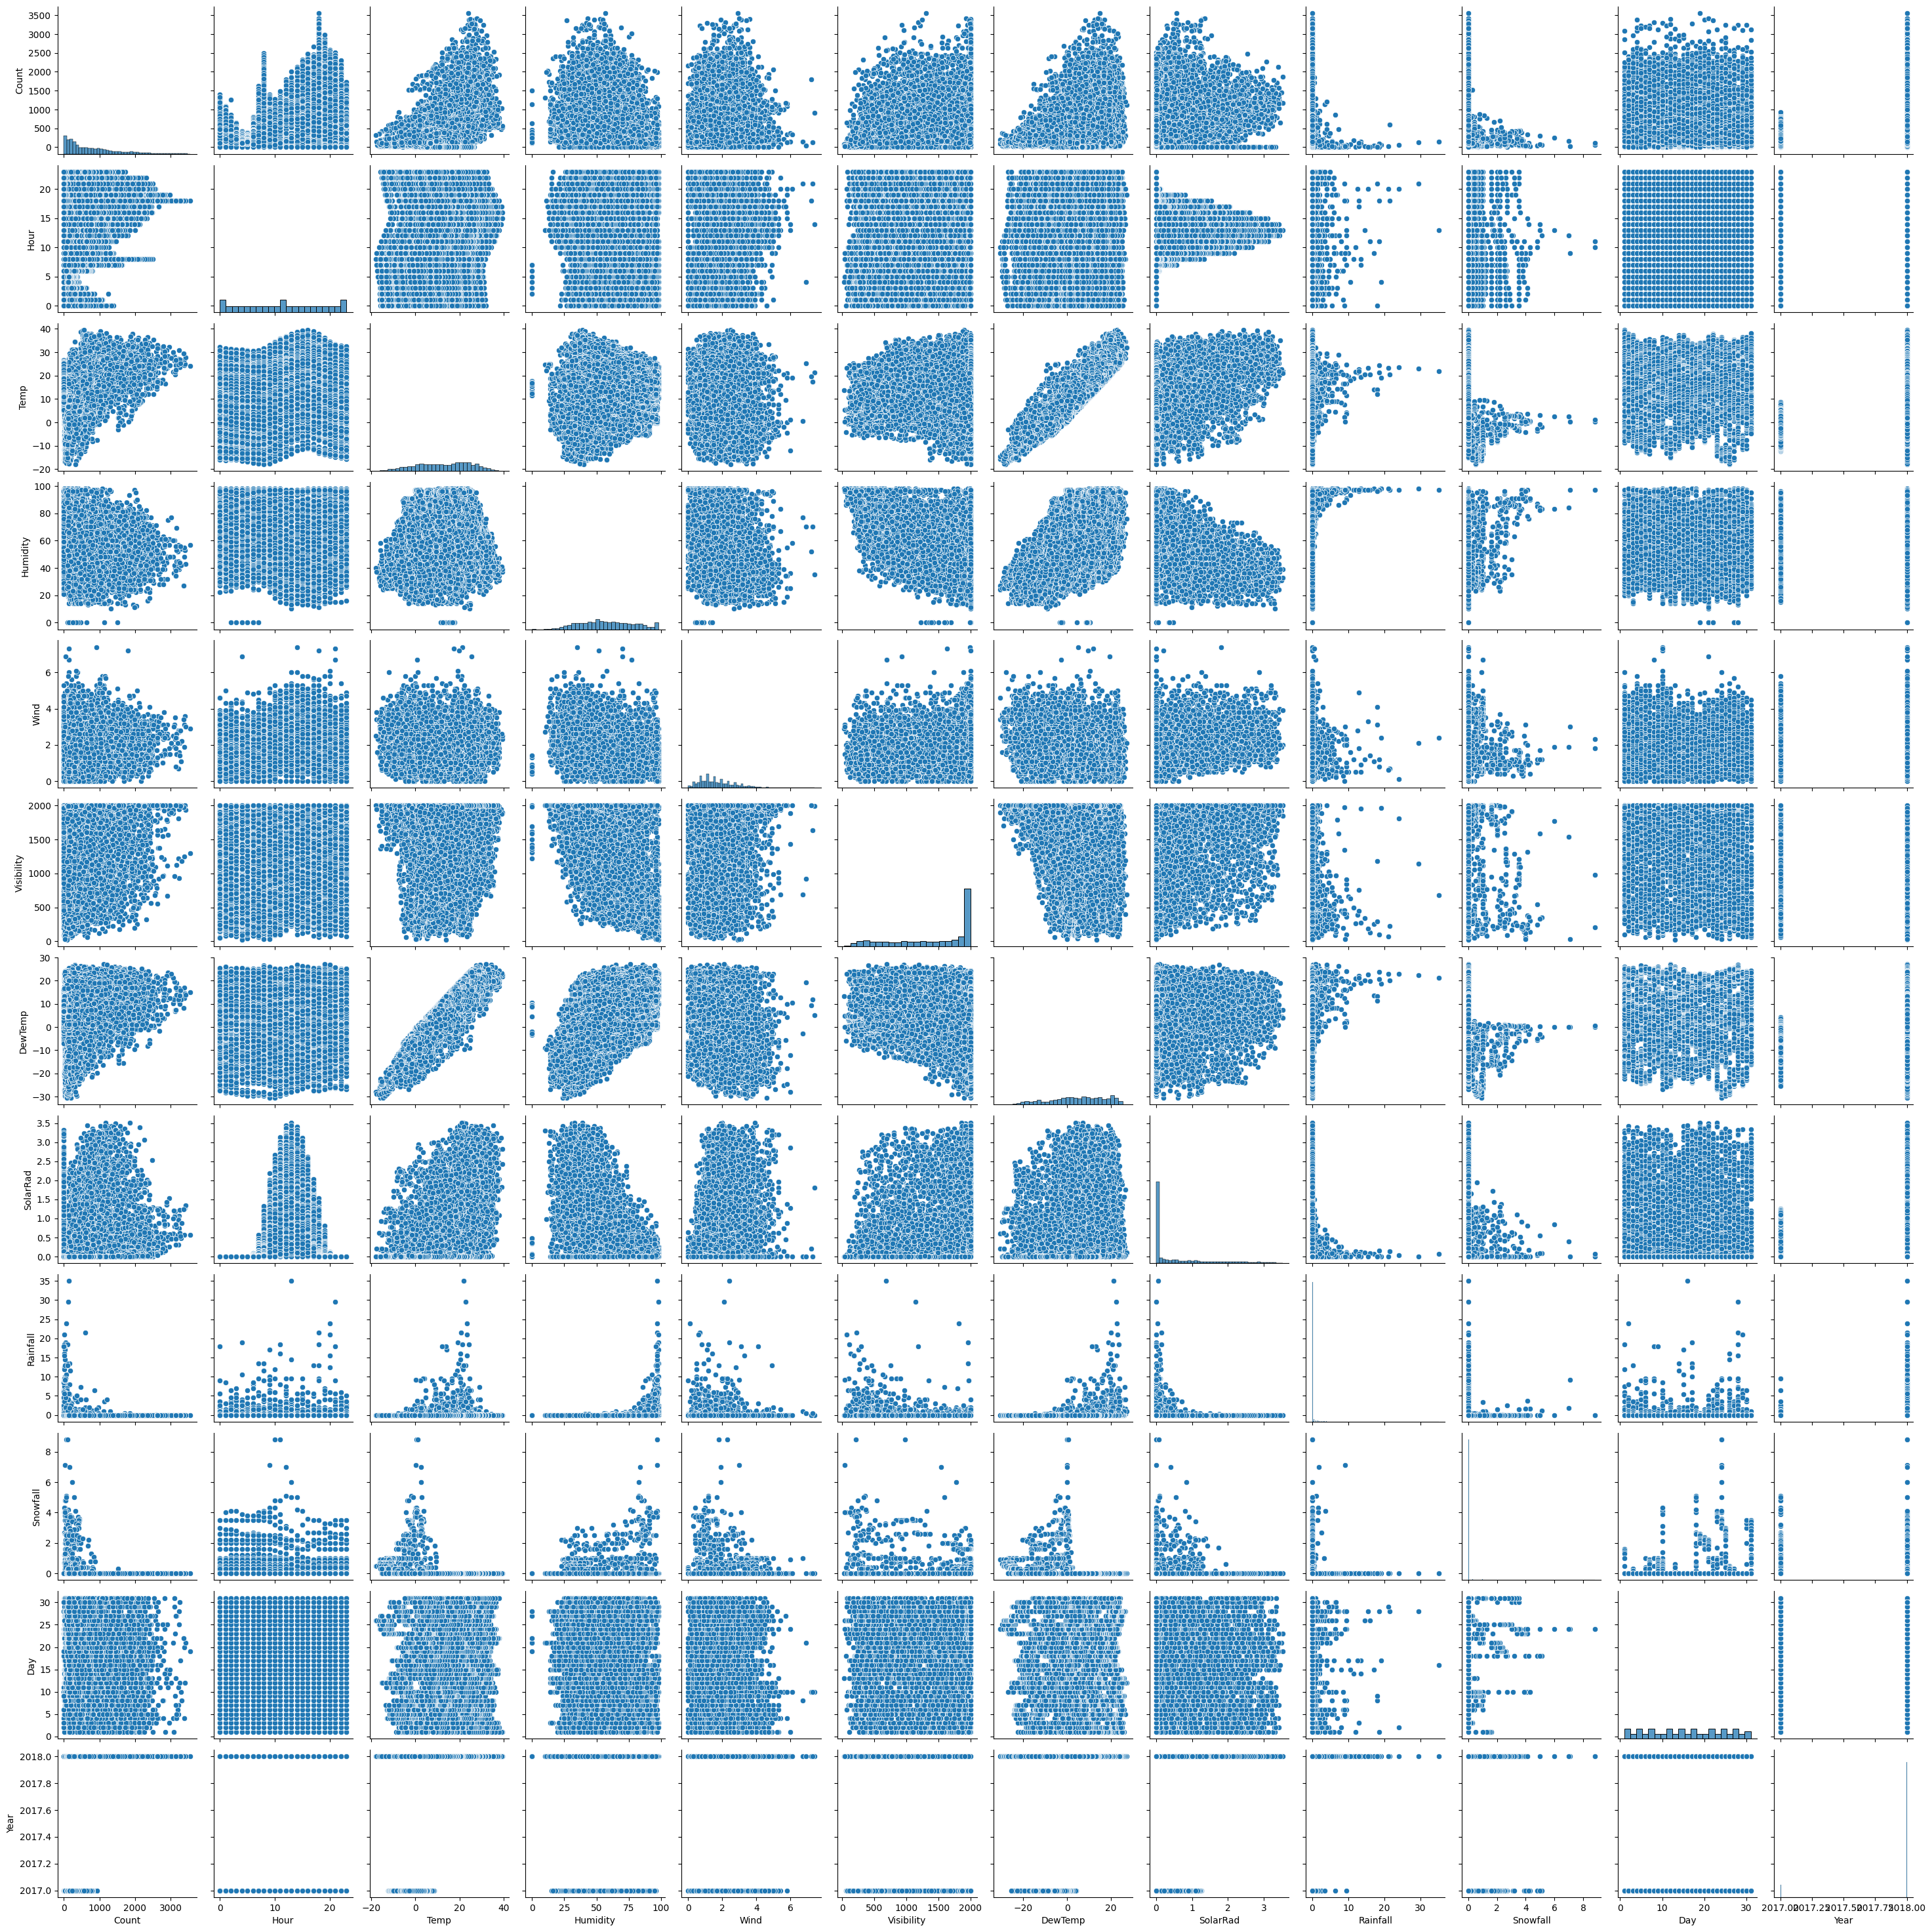

In [30]:
##pair plot 
sns.pairplot(df_bike)
plt.show()

In [31]:
##changed feature names
num_feat=[num for num in df_bike.columns if df_bike[num].dtype!='O']
num_feat

['Count',
 'Hour',
 'Temp',
 'Humidity',
 'Wind',
 'Visibility',
 'DewTemp',
 'SolarRad',
 'Rainfall',
 'Snowfall',
 'Day',
 'Year']

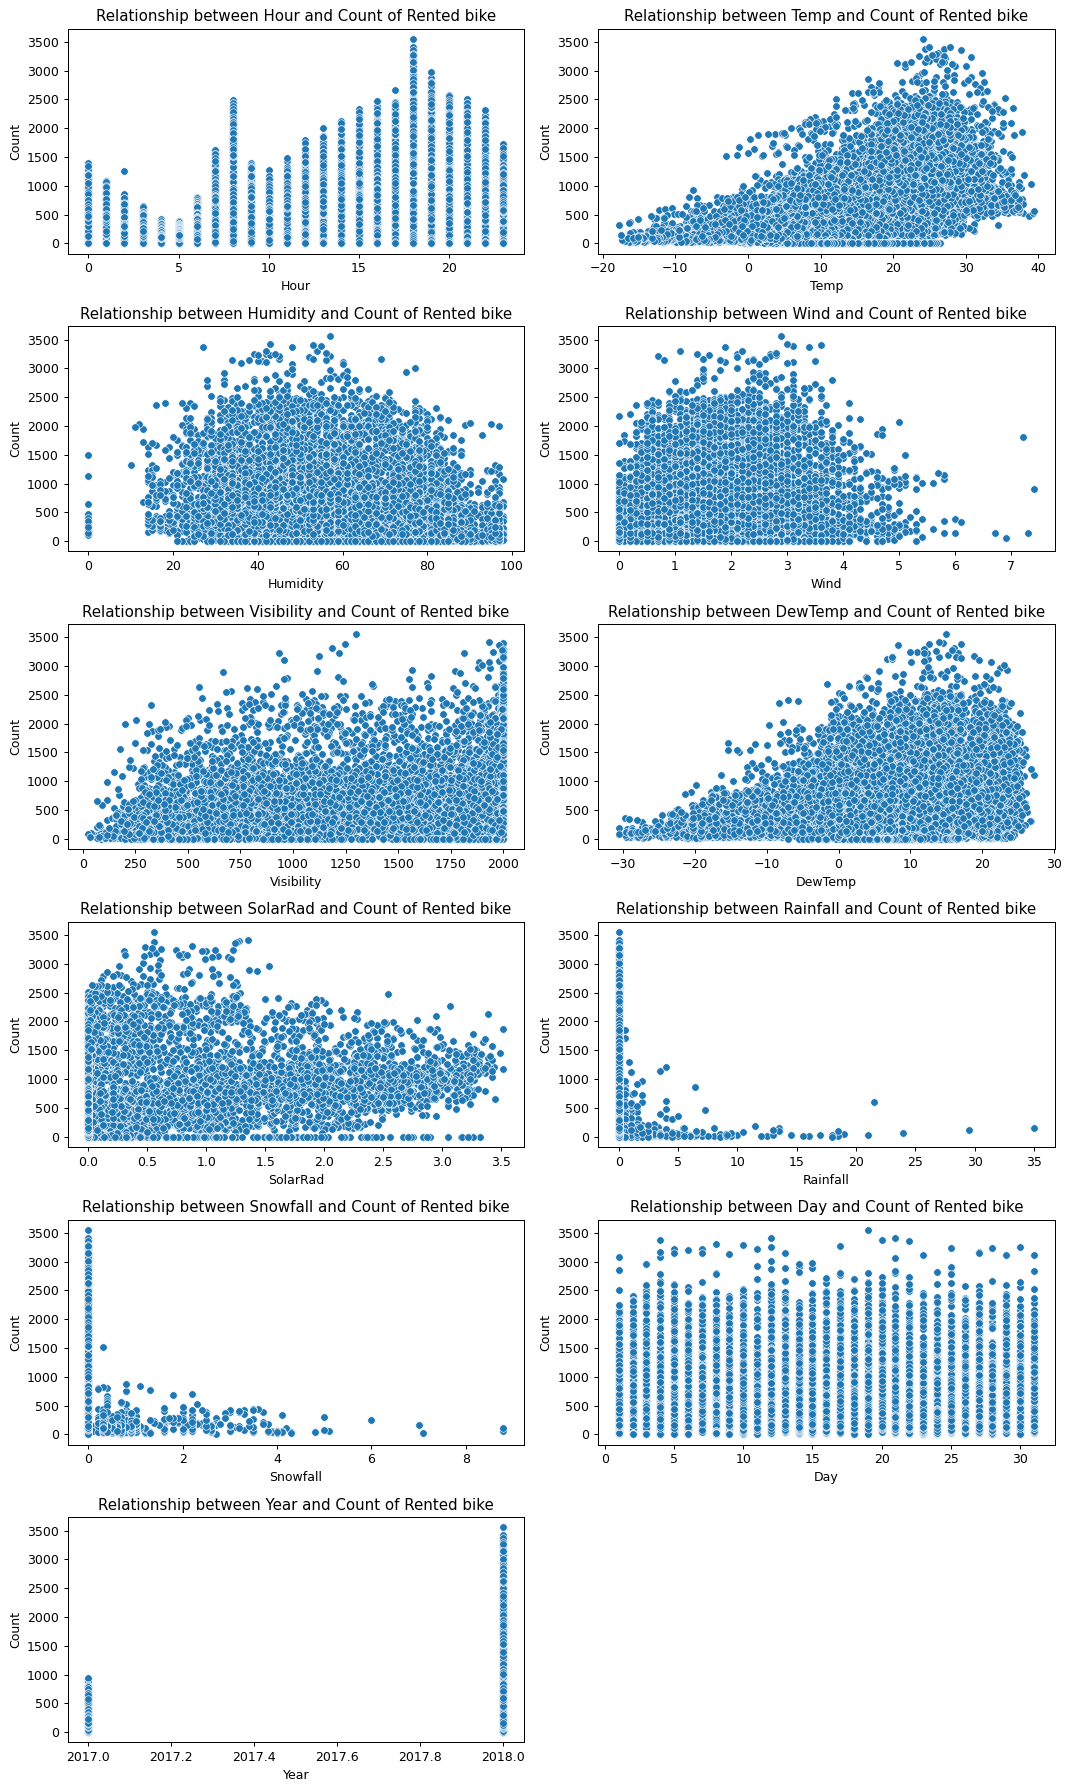

In [32]:
##plotting the relationship between target variable with numerical features
plt.figure(figsize=(12, 20), dpi=90)

plot_features = [f for f in num_feat if f != 'Count']  # remove target
nrows = (len(plot_features) + 1) // 2  # compute rows automatically, and takes quotient value as number of rows

for i, feat in enumerate(plot_features, start=1):
    plt.subplot(nrows, 2, i)
    sns.scatterplot(x=df_bike[feat], y=df_bike['Count'])
    plt.title(f"Relationship between {feat} and Count of Rented bike")

plt.tight_layout()
plt.show()

## Observation
1. Month-Count: So maximum customer rented the bike mostly in the month range from May to October of entire year.
2. Hour-Count: the demand of bikes starts from early at 0.0 AM little bit and drops upto 5AM, after that customer gradually starts renting it from 6AM to 8AM then drops a bit again but the demand of rented bike goes up from 10 AM constantly upto 6PM then slowing drops until 11PM.  
3. Temp-Count: At low temperature, customer rented hardly few bikes (e.g 500-700) but as the temperature increase the demand of renting bikes also increases.
4. Humidity-Count: The optimal level of humidity to rent the bikes at Seoul would be 35-60.
5. Wind-Count: At low wind speed, higher the demand of bikes.
6. Visibility-Count: Higher the visibility and higher the demand of bike.
7. (Rainfall & Snowfall)-Count: Less rainfall and snowfall higher demand and also have similar pattern.

In [33]:
##cat feature
cat_feat=[i for i in df_bike.columns if df_bike[i].dtype=='O']
cat_feat

['Seasons', 'Holiday', 'FuncDay', 'WeekDay', 'Month']

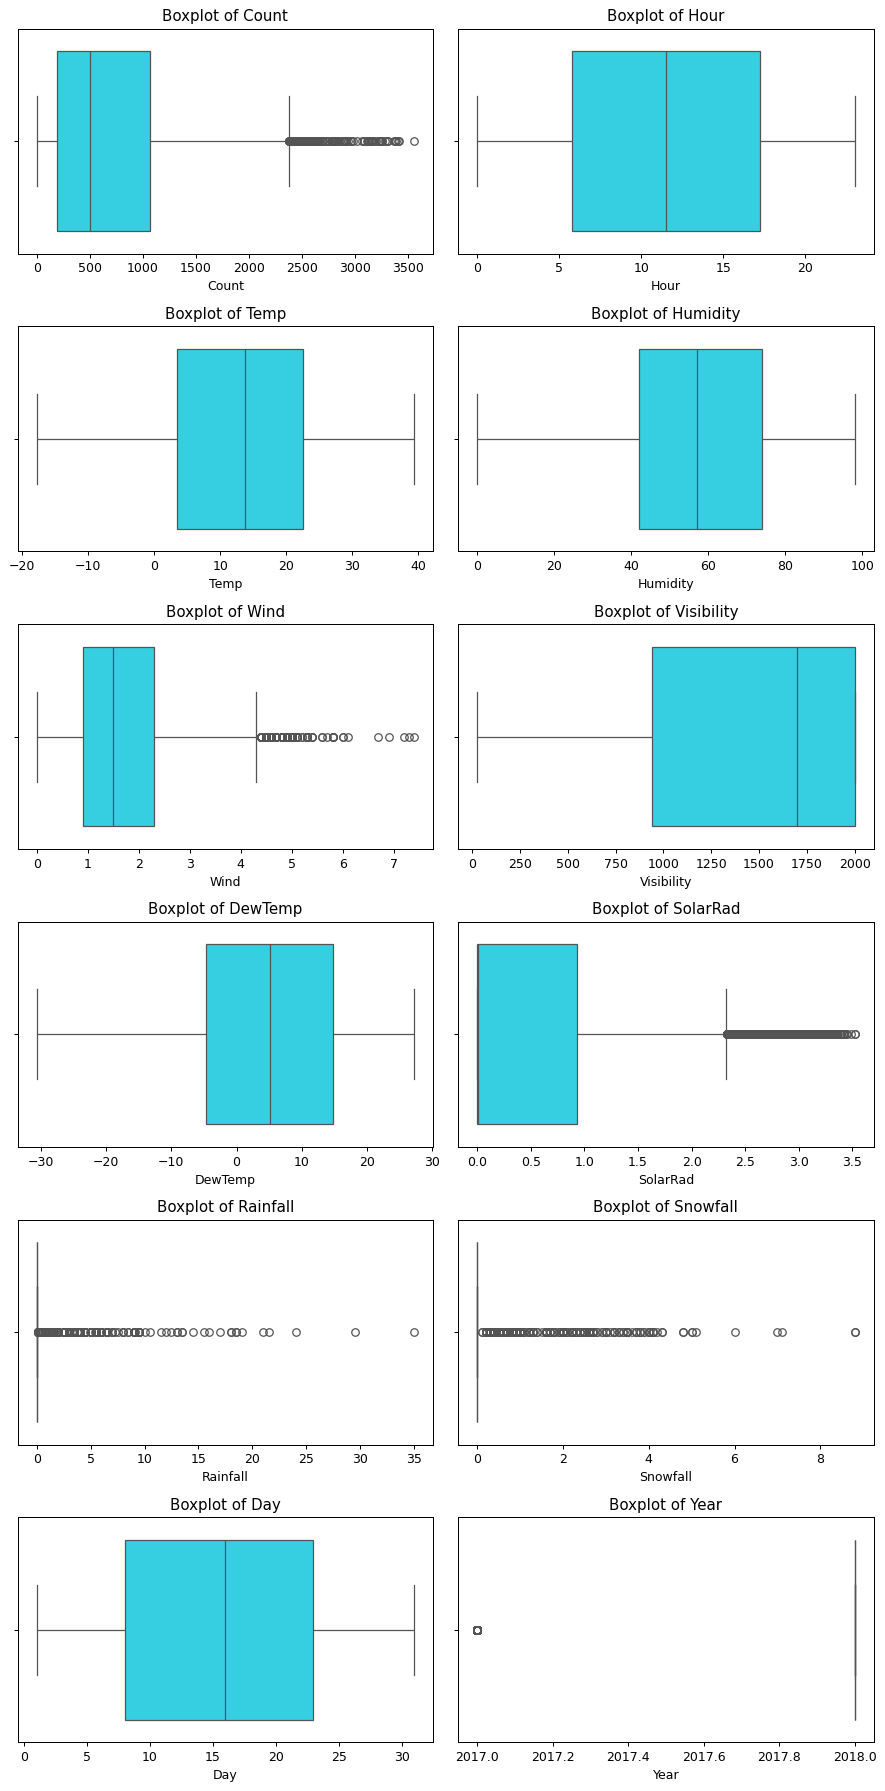

In [34]:
##boxplot of numerical features
plt.figure(figsize=(10,20),dpi=90)

nrows=(len(num_feat)+1)//2

for i, feat in enumerate(num_feat,start=1):
    plt.subplot(nrows,2,i)
    sns.boxplot(x=df_bike[feat], color=[0.1,0.9,1])
    plt.title(f'Boxplot of {feat}')
plt.tight_layout()
plt.show()

## Observation
This boxplot shows that the features such as rented bike count, wind, solar radiation, rainfall and snowfall has some outliers. 

## Treatment
Outlier treatment is needed to the dataset.

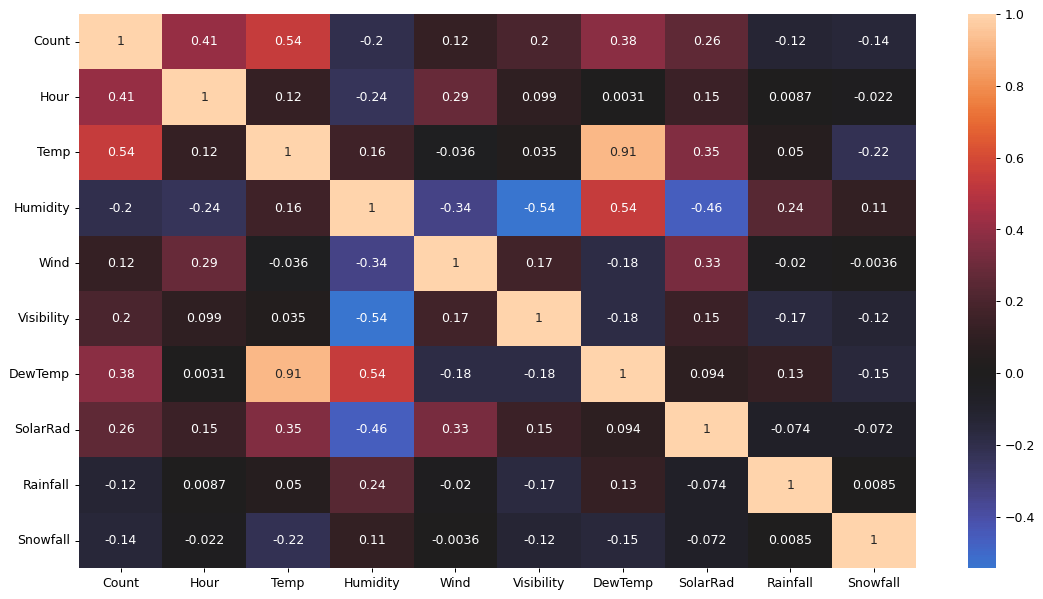

In [35]:
##Correlation of the data with heat map
##selecting only the numerical values
corr_matrix=df_bike.select_dtypes(include='float').corr()
plt.figure(figsize=(15,8),dpi=90)
sns.heatmap(corr_matrix,annot=True, center=0)
plt.show()


## Observation 
It is interesting to see that Dew point temperature predictor feature is highly correlated with Temperature predictor feature having correlation coefficient is 0.91, so it can cause the multicoliearity issue. 

# VIF Test

In [36]:
## separating the independent and dependent feature
X=df_bike.iloc[:,2:]
y=df_bike.iloc[:,1]

In [39]:
## checking the presence of multicollinearity in the data
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif_coef(X):
    # Calculating VIF
    vif = pd.DataFrame()
    ##independent features only
    vif["Predictor"] = X.columns
    ## VIF taking numpy array(X.values) of independent feature and position(i) of the feature
    vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
    return (vif)

In [40]:
##calculating the variance inflation factor
calc_vif_coef(X.select_dtypes(['float']))

Predictor  VIF Score
0        Temp  29.075866
1    Humidity   5.069743
2        Wind   4.517664
3  Visibility   9.051931
4     DewTemp  15.201989
5    SolarRad   2.821604
6    Rainfall   1.079919
7    Snowfall   1.118903

In [41]:
## Dew temperature feature has high correlation to another independent feature i.e Temperature
del X['DewTemp']

In [42]:
calc_vif_coef(X.select_dtypes(['float']))

Predictor  VIF Score
0        Temp   3.166007
1    Humidity   4.758651
2        Wind   4.079926
3  Visibility   4.409448
4    SolarRad   2.246238
5    Rainfall   1.078501
6    Snowfall   1.118901

## Observation 
Now the VIF score is less than 5 which means the data is free from high multicollinearity problem among the predictors. 

# Periodicity Checks

<Axes: xlabel='Hour'>

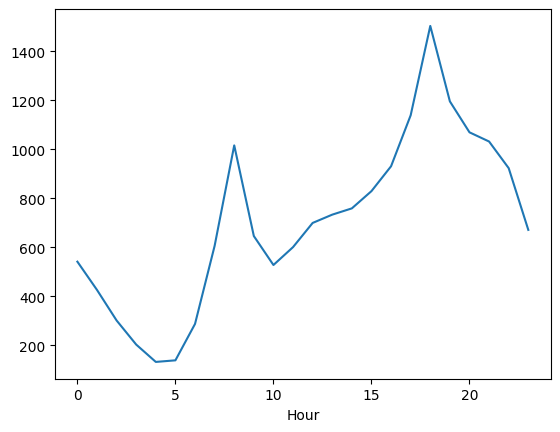

In [43]:
##Hours vs rental demand
df_bike.groupby('Hour')['Count'].mean().plot()

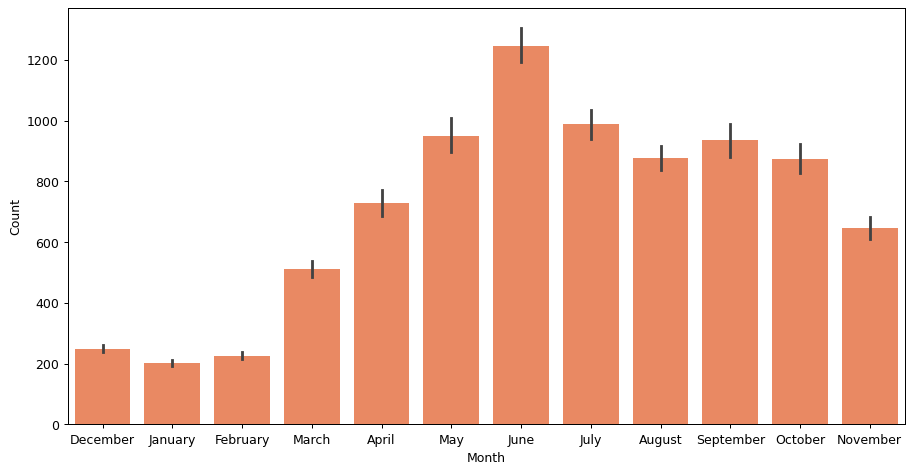

In [44]:
## Month vs demand analysis
Month=df_bike.groupby('Month')['Count'].sum().reset_index()
plt.figure(figsize=(12,6),dpi=90)
sns.barplot(x=df_bike['Month'],y=df_bike['Count'],data=Month, color=[1,0.5,0.3])
plt.show()

## Observation
Maximum Users starts to rent the bikes from March to October/November but in three months from December to February, there is very less chances of bikes being used for travel in Seoul, may be cold weather.

In [45]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Count       8760 non-null   float64
 1   Hour        8760 non-null   float64
 2   Temp        8760 non-null   float64
 3   Humidity    8760 non-null   float64
 4   Wind        8760 non-null   float64
 5   Visibility  8760 non-null   float64
 6   DewTemp     8760 non-null   float64
 7   SolarRad    8760 non-null   float64
 8   Rainfall    8760 non-null   float64
 9   Snowfall    8760 non-null   float64
 10  Seasons     8760 non-null   object 
 11  Holiday     8760 non-null   object 
 12  FuncDay     8760 non-null   object 
 13  Day         8760 non-null   int32  
 14  WeekDay     8760 non-null   object 
 15  Month       8760 non-null   object 
 16  Year        8760 non-null   int32  
dtypes: float64(10), int32(2), object(5)
memory usage: 1.1+ MB


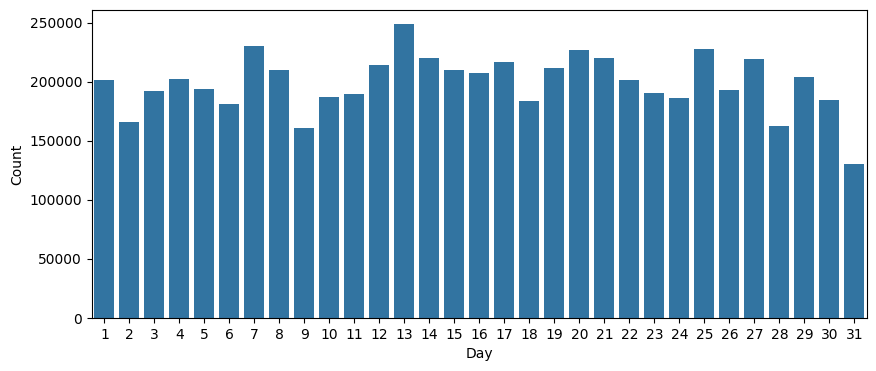

In [46]:
##week days vs demand analysis
plt.figure(figsize=(10,4))
days=df_bike.groupby('Day').sum().reset_index()
sns.barplot(x='Day',y='Count', data=days)
plt.show()

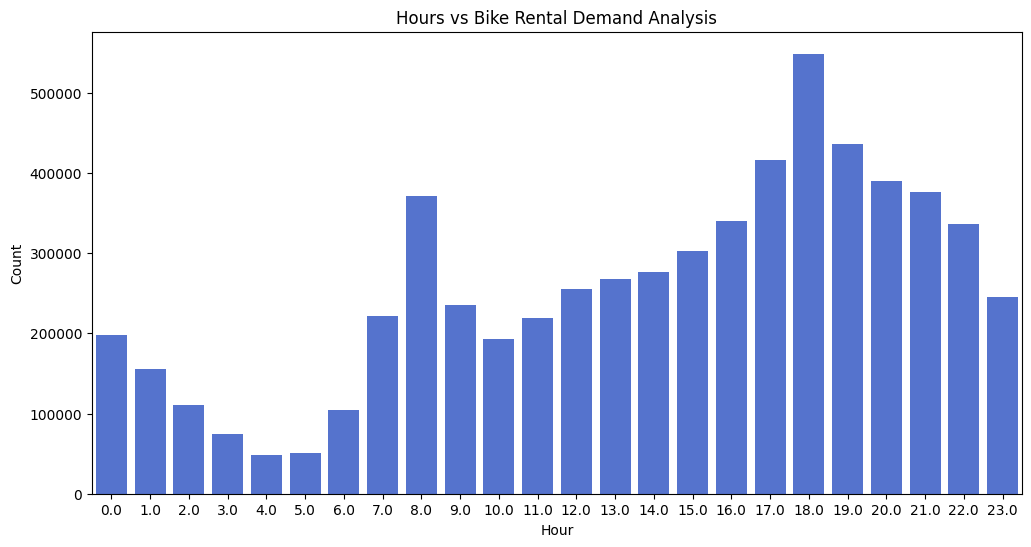

In [47]:
## Hours vs Bike rental demand analysis

plt.figure(figsize=(12,6))
hours=df_bike.groupby('Hour').sum().reset_index()
sns.barplot(x="Hour", y="Count", data=hours, color='royalblue')
plt.title("Hours vs Bike Rental Demand Analysis")
plt.show()

## Observation 
As compared to weekend, week days has higher demand of bikes probably the reason is people works on week days.

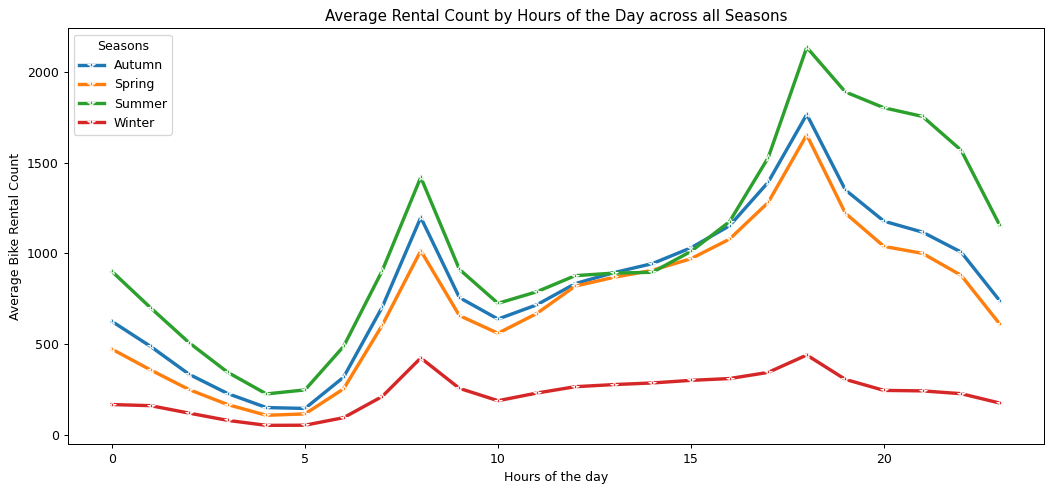

In [48]:
## Average user count by Hours of the day across season
avg_user_hr=df_bike.groupby(['Seasons','Hour'])['Count'].mean().reset_index()
##plot
plt.figure(figsize=(14,6), dpi=90)
sns.lineplot(x='Hour',y='Count', hue='Seasons', marker='*',data=avg_user_hr, linewidth=2.7)
plt.title("Average Rental Count by Hours of the Day across all Seasons")
plt.xlabel("Hours of the day")
plt.ylabel("Average Bike Rental Count")
plt.show()

## Observation
1. Summar season: It is the highest bike rental demand season among all seasons, and it shows a peak hours pattern at 8AM and 18PM.
2. Autum season: It is the second highest bike rental demand season with similar peak hours pattern.
3. Spring season: It is a 3rd highest bike rental demand season with similar peak hour pattern.
4. Winter season: Winter has low bike rental demand, normally users prefer not to use bikes to travel in winter.

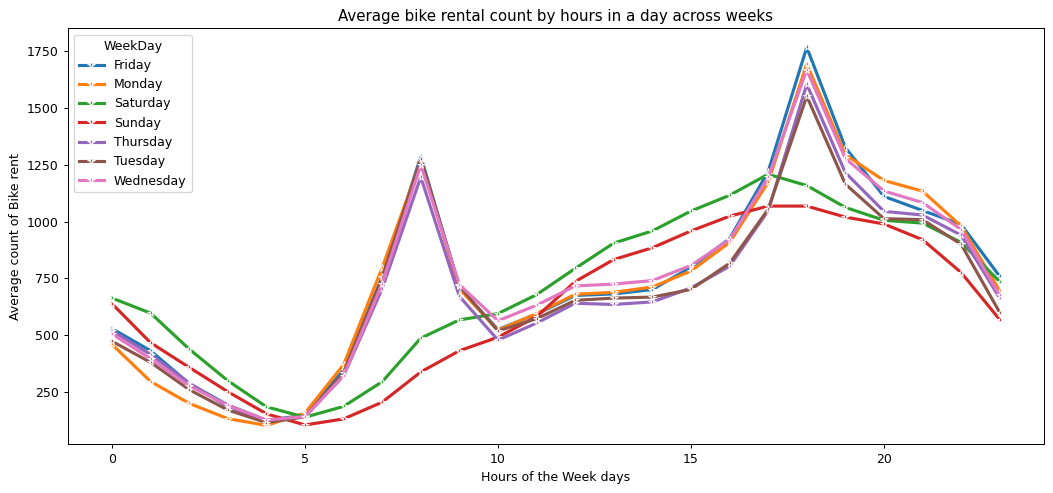

In [49]:
## Average Rental bike count by hours of the day across weekdays
wdays=df_bike.groupby(['WeekDay','Hour'])['Count'].mean().reset_index()
plt.figure(figsize=(14,6), dpi=90)
sns.lineplot(x='Hour',y='Count',hue='WeekDay',marker='*',data=wdays, linewidth=2.5)
plt.title("Average bike rental count by hours in a day across weeks")
plt.xlabel("Hours of the Week days")
plt.ylabel('Average count of Bike rent')
plt.show()

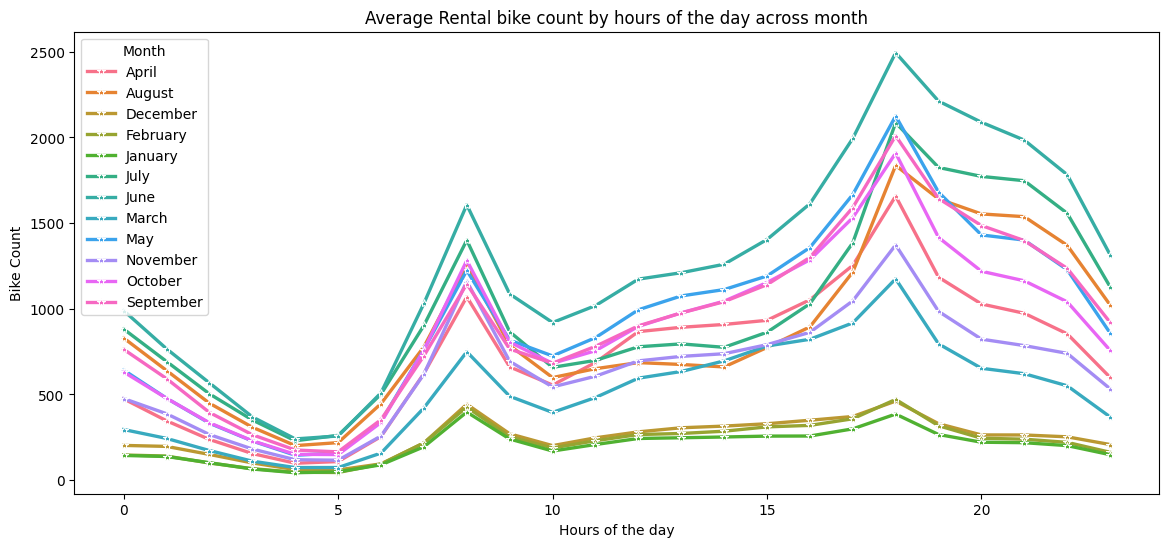

In [50]:
##Average Rental bike count by hours of the day across month
mhour=df_bike.groupby(['Hour','Month'])['Count'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x='Hour',y='Count',hue='Month', data=mhour, marker='*',linewidth=2.4)
plt.title("Average Rental bike count by hours of the day across month")
plt.xlabel("Hours of the day")
plt.ylabel("Bike Count")
plt.show()

## Observation:
The average demand of bike rental count  except Jan, Feb and Dec has higher at 8AM and 18PM

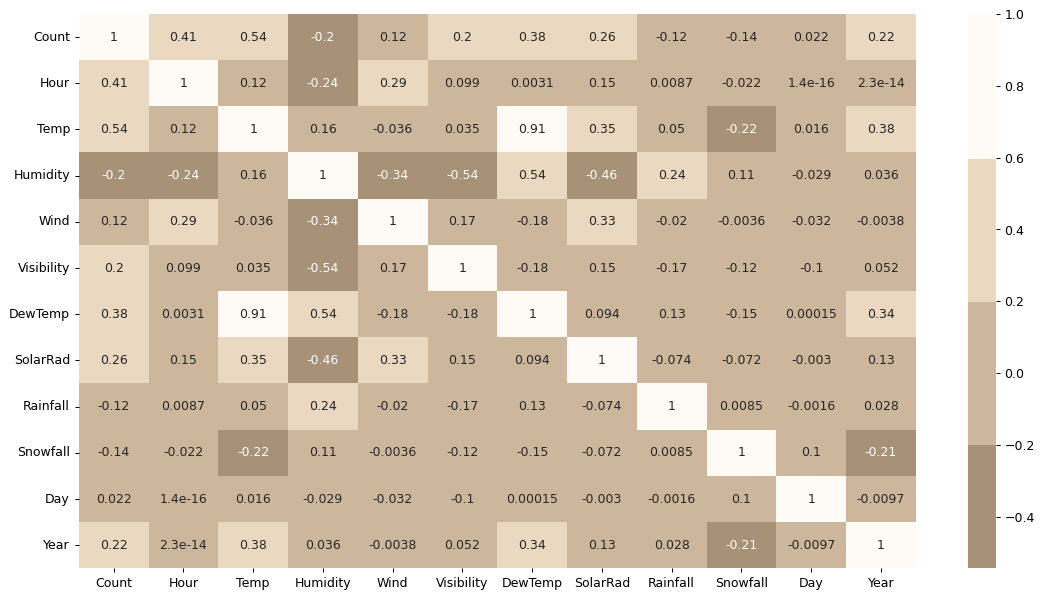

In [51]:
corr_matrix=df_bike.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=(15,8),dpi=90)
sns.heatmap(corr_matrix,annot=True, center=0, cmap=['#8A6D55', '#A79277', '#CDB79C', '#EAD8C0', '#FEFAF6'])
plt.show()

In [52]:
## Saved the dataset
df_bike.to_csv("BikeData.csv")